In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('..\input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

..\input\items.csv
..\input\item_categories.csv
..\input\sales_train.csv.gz
..\input\sample_submission.csv.gz
..\input\shops.csv
..\input\test.csv.gz


In [2]:
item_categories = pd.read_csv("../input/item_categories.csv")
items = pd.read_csv("../input/items.csv")
shops = pd.read_csv("../input/shops.csv")
train = pd.read_csv("../input/sales_train.csv.gz")
test = pd.read_csv("../input/test.csv.gz")

In [3]:
print("Item categories")
print(item_categories.head(10))
print("\nItems")
print(items.head(10))
print("\nShops")
print(shops.head(10))
print("\nTrain set")
print(train.head(10))
print("\nTest set")
print(test.head(10))

Item categories
        item_category_name  item_category_id
0  PC - Гарнитуры/Наушники                 0
1         Аксессуары - PS2                 1
2         Аксессуары - PS3                 2
3         Аксессуары - PS4                 3
4         Аксессуары - PSP                 4
5      Аксессуары - PSVita                 5
6    Аксессуары - XBOX 360                 6
7    Аксессуары - XBOX ONE                 7
8           Билеты (Цифра)                 8
9          Доставка товара                 9

Items
                                           item_name  item_id  \
0          ! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.)         D        0   
1  !ABBYY FineReader 12 Professional Edition Full...        1   
2      ***В ЛУЧАХ СЛАВЫ   (UNV)                    D        2   
3    ***ГОЛУБАЯ ВОЛНА  (Univ)                      D        3   
4        ***КОРОБКА (СТЕКЛО)                       D        4   
5  ***НОВЫЕ АМЕРИКАНСКИЕ ГРАФФИТИ  (UNI)         ...        5   
6           ***УДАР ПО ВОРО

In [4]:
print(train.info())
print(train.describe())
print(train.item_cnt_day.value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
date              object
date_block_num    int64
shop_id           int64
item_id           int64
item_price        float64
item_cnt_day      float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB
None
       date_block_num       shop_id       item_id    item_price  item_cnt_day
count    2.935849e+06  2.935849e+06  2.935849e+06  2.935849e+06  2.935849e+06
mean     1.456991e+01  3.300173e+01  1.019723e+04  8.908532e+02  1.242641e+00
std      9.422988e+00  1.622697e+01  6.324297e+03  1.729800e+03  2.618834e+00
min      0.000000e+00  0.000000e+00  0.000000e+00 -1.000000e+00 -2.200000e+01
25%      7.000000e+00  2.200000e+01  4.476000e+03  2.490000e+02  1.000000e+00
50%      1.400000e+01  3.100000e+01  9.343000e+03  3.990000e+02  1.000000e+00
75%      2.300000e+01  4.700000e+01  1.568400e+04  9.990000e+02  1.000000e+00
max      3.300000e+01  5.900000e+01  2.216900e

In [5]:
train.sort_values(by=['date']).head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
16164,01.01.2013,0,28,11613,1499.0,1.0
101474,01.01.2013,0,51,10283,667.0,1.0
10197,01.01.2013,0,19,2828,499.0,1.0
101457,01.01.2013,0,51,10390,150.0,1.0
101455,01.01.2013,0,51,10591,110.0,1.0


In [6]:
item_to_cat = {}
for idx, row in items.iterrows():
    #print(row)
    item_to_cat[row.item_id] = row.item_category_id
cat_id_to_name = {}
for idx, row in item_categories.iterrows():
    cat_id_to_name[row.item_category_id] = row.item_category_name

In [7]:
default_category_idx = len(item_categories)

In [8]:
train['item_category_id'] = train['item_id'].map(item_to_cat)

In [9]:
new_train = train[['date_block_num','shop_id','item_id','item_category_id','item_cnt_day','item_price']]

In [10]:
print(new_train.head(10))

   date_block_num  shop_id  item_id  item_category_id  item_cnt_day  \
0               0       59    22154                37           1.0   
1               0       25     2552                58           1.0   
2               0       25     2552                58          -1.0   
3               0       25     2554                58           1.0   
4               0       25     2555                56           1.0   
5               0       25     2564                59           1.0   
6               0       25     2565                56           1.0   
7               0       25     2572                55           1.0   
8               0       25     2572                55           1.0   
9               0       25     2573                55           3.0   

   item_price  
0      999.00  
1      899.00  
2      899.00  
3     1709.05  
4     1099.00  
5      349.00  
6      549.00  
7      239.00  
8      299.00  
9      299.00  


In [11]:
processing_train = pd.DataFrame(new_train.groupby(['date_block_num','item_category_id'])['item_cnt_day'].sum().reset_index())

In [12]:
print(processing_train)

      date_block_num  item_category_id  item_cnt_day
0                  0                 0           1.0
1                  0                 1           1.0
2                  0                 2        1390.0
3                  0                 3         440.0
4                  0                 4         251.0
5                  0                 5         623.0
6                  0                 6         870.0
7                  0                 9         149.0
8                  0                11         375.0
9                  0                13          84.0
10                 0                14         143.0
11                 0                15         268.0
12                 0                18           3.0
13                 0                19        8983.0
14                 0                21        3492.0
15                 0                22        1286.0
16                 0                23        4150.0
17                 0                25        

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

In [14]:
processing_train['category'] = processing_train['item_category_id'].map(cat_id_to_name)
for i in range(0,84,8):
    pass
    #processed = processing_train[(processing_train.item_category_id >= i ) & (processing_train.item_category_id < i+8)]
    #g = sns.FacetGrid(processed, col="category", col_wrap=4, height=3)
    #g.map(sns.lineplot, "date_block_num", "item_cnt_day", color=".3", ci=None);


In [15]:
processing_train_2 = pd.DataFrame(new_train.groupby(['date_block_num','shop_id'])['item_cnt_day'].sum().reset_index())

In [16]:
for i in range(0,61,8):
    pass
    #processed = processing_train_2[(processing_train_2.shop_id >= i) & (processing_train_2.shop_id < i+8)]
    #g = sns.FacetGrid(processed, col="shop_id", col_wrap=4, height=3)
    #g.map(sns.lineplot, "date_block_num", "item_cnt_day", color=".3", ci=None);


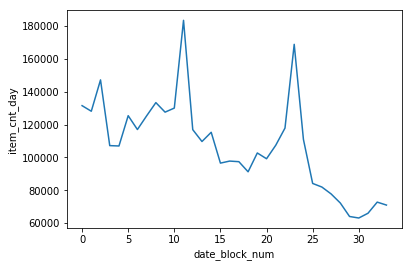

In [17]:
processing_train_3 = pd.DataFrame(new_train.groupby(['date_block_num'])['item_cnt_day'].sum().reset_index())
sns.lineplot(x='date_block_num',y='item_cnt_day',data=processing_train_3)

In [18]:
for c in new_train:
    print(f"NANs in {c}:{new_train[c].isnull().sum()}")

NANs in date_block_num:0
NANs in shop_id:0
NANs in item_id:0
NANs in item_category_id:0
NANs in item_cnt_day:0
NANs in item_price:0


In [19]:
new_train.head()

,date_block_num,shop_id,item_id,item_category_id,item_cnt_day,item_price
0,0,59,22154,37,1.0,999.00
1,0,25,2552,58,1.0,899.00
2,0,25,2552,58,-1.0,899.00
3,0,25,2554,58,1.0,1709.05
4,0,25,2555,56,1.0,1099.00


In [20]:
new_train['month_value'] = new_train['date_block_num'] % 12
month_value_name_map = {
    0:'January',
    1:'February',
    2:'March',
    3:'April',
    4:'May',
    5:'June',
    6:'July',
    7:'August',
    8:'September',
    9:'October',
    10:'November',
    11:'December'
}
new_train.month_value = new_train.month_value.map(month_value_name_map)

new_train.month_value.value_counts()

#new_train = pd.get_dummies(new_train, columns = ['month_value'], prefix='month_')
new_train.head()

,date_block_num,shop_id,item_id,item_category_id,item_cnt_day,item_price,month_value
0,0,59,22154,37,1.0,999.00,January
1,0,25,2552,58,1.0,899.00,January
2,0,25,2552,58,-1.0,899.00,January
3,0,25,2554,58,1.0,1709.05,January
4,0,25,2555,56,1.0,1099.00,January


In [21]:
negativeValues = new_train[new_train['item_cnt_day'] == -1.0].index
new_train.drop(negativeValues, inplace=True)

In [22]:
#month_cols = ['month__'+ v for v in month_value_name_map.values()]
grouped_train = pd.DataFrame(new_train.groupby(['date_block_num','shop_id','item_id','item_category_id','month_value','item_price'])['item_cnt_day'].sum().reset_index())

In [23]:
grouped_train.shape

(1737899, 7)

In [24]:
grouped_train.head()

,date_block_num,shop_id,item_id,item_category_id,month_value,item_price,item_cnt_day
0,0,0,32,40,January,221.0,6.0
1,0,0,33,37,January,347.0,3.0
2,0,0,35,40,January,247.0,1.0
3,0,0,43,40,January,221.0,1.0
4,0,0,51,57,January,127.0,1.0


In [25]:
cat_enc = OneHotEncoder()
transformed = ['item_category_id','month_value', 'shop_id']
cat_enc.fit(grouped_train[transformed])
transformed_train = pd.DataFrame(data=cat_enc.transform(grouped_train[transformed]).toarray())
transformed_train = pd.concat([grouped_train, transformed_train],axis=1)
print(transformed_train.head())

   date_block_num  shop_id  item_id  item_category_id month_value  item_price  \
0               0        0       32                40     January       221.0   
1               0        0       33                37     January       347.0   
2               0        0       35                40     January       247.0   
3               0        0       43                40     January       221.0   
4               0        0       51                57     January       127.0   

   item_cnt_day    0    1    2  ...  146  147  148  149  150  151  152  153  \
0           6.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1           3.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2           1.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3           1.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4           1.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   154  155  
0  0.0  0.0  
1  0.0  0.

In [26]:
columns = ['date_block_num','item_id','item_price'] + list(i for i in range(156))
non_cat_columns = ['date_block_num','item_id','item_price']
length = int(0.90*len(transformed_train))

test_set = transformed_train.iloc[length:]
train_set = transformed_train.iloc[:length]

X_train_temp = train_set[columns]
X_test_temp = test_set[columns]

X_train = X_train_temp
y_train = train_set['item_cnt_day']

X_test = X_test_temp
y_test = test_set['item_cnt_day']


In [27]:
print(X_test.head())
print(y_train.head())

         date_block_num  item_id  item_price    0    1    2    3    4    5  \
1564109              29    12204       349.0  0.0  0.0  0.0  0.0  0.0  0.0   
1564110              29    12361        99.0  0.0  0.0  0.0  0.0  0.0  0.0   
1564111              29    12452       499.0  0.0  0.0  0.0  0.0  0.0  0.0   
1564112              29    12459       200.0  0.0  0.0  0.0  0.0  0.0  0.0   
1564113              29    12812       149.0  0.0  0.0  0.0  0.0  0.0  0.0   

           6  ...  146  147  148  149  150  151  152  153  154  155  
1564109  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1564110  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1564111  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1564112  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1564113  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 159 columns]
0    6.0
1    3.0
2    1.0
3    1.0
4    1.0
Name: item_cnt_day, dtype: float64


In [28]:
X_dev = test
X_dev.drop('ID',inplace=True, axis=1)
X_dev['date_block_num'] = 34
X_dev['item_category_id'] = X_dev['item_id'].map(item_to_cat)
X_dev.head()

,shop_id,item_id,date_block_num,item_category_id
0,5,5037,34,19
1,5,5320,34,55
2,5,5233,34,19
3,5,5232,34,23
4,5,5268,34,20


In [29]:
mean_prices=pd.DataFrame(new_train.groupby(['item_id'])['item_price'].mean().reset_index())
mean_prices_for_cat = pd.DataFrame(new_train.groupby(['item_category_id'])['item_price'].mean().reset_index())
def get_price_for_id(item_id, item_category_id):
    try:
        return float(mean_prices[mean_prices.item_id == item_id].item_price)
    except:
        return float(mean_prices_for_cat[mean_prices_for_cat.item_category_id == item_category_id].item_price)

item_ids = list(X_dev.item_id.unique())
id_to_price = {}
for item_id in item_ids:
    item_category = item_to_cat.get(item_id)
    id_to_price[item_id] = get_price_for_id(item_id, item_category)
X_dev['item_price'] = X_dev['item_id'].map(id_to_price)
X_dev.head()

,shop_id,item_id,date_block_num,item_category_id,item_price
0,5,5037,34,19,1923.611577
1,5,5320,34,55,286.183889
2,5,5233,34,19,800.777500
3,5,5232,34,23,787.346357
4,5,5268,34,20,2791.470600


In [30]:
X_dev['month_value'] = 'November'
transformed = ['item_category_id','month_value','shop_id']
#print(X_dev[transformed])
transformed_test = pd.DataFrame(data=cat_enc.transform(X_dev[transformed]).toarray())
transformed_test = pd.concat([X_dev, transformed_test],axis=1)
transformed_test.head()

,shop_id,item_id,date_block_num,item_category_id,item_price,month_value,0,1,2,3,...,146,147,148,149,150,151,152,153,154,155
0,5,5037,34,19,1923.611577,November,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5,5320,34,55,286.183889,November,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5,5233,34,19,800.777500,November,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5,5232,34,23,787.346357,November,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,5268,34,20,2791.470600,November,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
X_predict = transformed_test[columns]
X_predict.head()

,date_block_num,item_id,item_price,0,1,2,3,4,5,6,...,146,147,148,149,150,151,152,153,154,155
0,34,5037,1923.611577,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,34,5320,286.183889,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,34,5233,800.777500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,34,5232,787.346357,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,34,5268,2791.470600,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
from sklearn import linear_model
from sklearn import metrics

print("Meetodi parameetrite loetelu koos vaikeväärtustega:")
print(linear_model.LinearRegression())

print()
# Loome mudeli
regr = linear_model.LinearRegression()
# Õpetame mudelit
regr.fit(X_train, y_train)
# Kasutame mudelit testkorpuse andmete põhjal ennustamisel
X_predict["item_cnt_month_predict"] = regr.predict(X_predict)
# Arvutame skoori ja keskmise absoluutvea (MAE)
print("LinearRegression täpsus:", regr.score(X_test, y_test))
print(X_predict.head())

Meetodi parameetrite loetelu koos vaikeväärtustega:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)



C:\Users\Egert\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


LinearRegression täpsus: 0.08464236057300556
   date_block_num  item_id   item_price    0    1    2    3    4    5    6  \
0              34     5037  1923.611577  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1              34     5320   286.183889  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2              34     5233   800.777500  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3              34     5232   787.346357  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4              34     5268  2791.470600  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   ...  147  148  149  150  151  152  153  154  155  item_cnt_month_predict  
0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0                1.998274  
1  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0                0.953794  
2  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0                1.772885  
3  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0                1.480585  
4  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0                3.943267  

[5 rows x 160 col

In [39]:
from keras.layers import Dense, Input, BatchNormalization
from keras.models import Sequential
from keras.optimizers import SGD
from keras.models import load_model

def model(inputshape,loss,opt,activation):
  mdl= Sequential()

  mdl.add(Dense(161, activation=activation, input_shape=(inputshape,)))
  mdl.add(BatchNormalization())
  mdl.add(Dense(100, activation=activation))
  mdl.add(Dense(50,activation=activation))
  mdl.add(Dense(30,activation=activation))
  mdl.add(Dense(20,activation=activation))
  mdl.add(Dense(10,activation=activation))
  mdl.add(Dense(1,activation=activation))
  mdl.add(BatchNormalization())
  
  mdl.compile(loss=loss, optimizer=opt)
  return mdl

In [60]:
inputshape = X_train.shape[1]+1
mdl = model(inputshape, "mean_squared_error","sgd",'tanh')
#hist = mdl.fit(X_train, y_train, epochs=1, batch_size=1000,validation_data = (X_test, y_test))
print(X_predict.shape)
y_pred = mdl.predict(X_predict)

temp_list = []
for i in range(156):
    temp_list.append(0)
predictions = [temp_list+price[0] for price in y_pred]
print(temp_list)
for i in range(20):
      print(y_pred[i][0], '-', cat_enc.inverse_transform(predictions)[i])

(214200, 160)
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
-0.27430138 - [[0 'April' 0]
 [0 'April' 0]
 [0 'April' 0]
 ...
 [0 'April' 0]
 [0 'April' 0]
 [0 'April' 0]]
-0.25974324 - [[0 'April' 0]
 [0 'April' 0]
 [0 'April' 0]
 ...
 [0 'April' 0]
 [0 'April' 0]
 [0 'April' 0]]
-0.1284871 - [[0 'April' 0]
 [0 'April' 0]
 [0 'April' 0]
 ...
 [0 'April' 0]
 [0 'April' 0]
 [0 'April' 0]]
-0.1284871 - [[0 'April' 0]
 [0 'April' 0]
 [0 'April' 0]
 ...
 [0 'April' 0]
 [0 'April' 0]
 [0 'April' 0]]
-0.3248215 - [[0 'April' 0]
 [0 'April' 0]
 [0 'April' 0]
 ...
 [0 'April' 0]
 